In [6]:
import numpy as np
import pandas as pd
%matplotlib inline


import numpy as np

import pandas as pd
import numpy as np
import  seaborn as sns
import rwi as rwi
import math



In [53]:
def load_df(name, periods):
    eurusd_df = pd.read_csv(name)
    eurusd_df = eurusd_df.rename(columns={'<TICKER>':'Ticker', '<DTYYYYMMDD>':'Date', '<TIME>':'Time', '<OPEN>':'Open', '<HIGH>':'High', '<LOW>':'Low', '<CLOSE>':'Close', '<VOL>':'Vol'})
    eurusd_df[['Date']] = pd.to_datetime(eurusd_df['Date'].astype('str'), yearfirst=True)
    eurusd_df =eurusd_df.sort_values(by=['Date', 'Time'])
    eur_df = eurusd_df[['Date', 'Time', 'Close']].rename(columns={'Close':'price'})
    eur_df['returns'] = eur_df['price'].pct_change(periods)
    eur_df.dropna(inplace=True)
    eur_df.sort_values(by=['Date', 'Time'])
    #eur_df = eur_df[eur_df.Date>'2019-01-01']
    return eur_df

In [54]:
instruments = ['eurusd', 'btc', 'spy']
tfs = [ '240min', '1d', '1w', '1m'] #'1min', '5min', '15min', '60min',

In [55]:

col_names = ['MomVal', 'MomDouble', 'h1', 'h2', 'h3', 'h4', 'MMIR', 'MMIP', 'ShannonVal', 'prop', 'var_std', 'var_mean', 'var_median', 'correl_1', 'correl_2', 'correl_3', 'correl_4', 'correl_5', 'correl_10', 'correl_20', 'correl_100']

In [56]:
periods = [1, 2, 3, 4, 5, 6, 7 ,8, 9, 10,11,12,13,14,15,16,17,18,19,20,30,40, 50,100,200]

In [57]:
def correl(df, corr_period):
    correl_1 = pd.Series.autocorr(df, corr_period)
    return correl_1

In [58]:
results = []
for inst in instruments:
    for tf in tfs:
        name = 'data/'+inst +'_'+tf+'.csv'
        
        for period in periods:
            
            
            for corr_period in periods:
                
                eur_df = load_df(name, period)
                val = correl(eur_df.returns, corr_period)
                results.append([inst, tf, period, corr_period, val])
                

C:\Users\lexik\.conda\envs\quant\lib\site-packages\numpy\lib\function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\lexik\.conda\envs\quant\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [59]:
result_df = pd.DataFrame.from_records(results, columns=['inst', 'tf', 'ret_period', 'corr_period', 'corr_value'])

In [60]:
result_df.dropna(inplace=True)

In [61]:
result_df.sort_values(by=['corr_value'])

,inst,tf,ret_period,corr_period,corr_value
4741,btc,1m,15,17,-1.0
7346,spy,1m,19,40,-1.0
4717,btc,1m,14,18,-1.0
4669,btc,1m,12,20,-1.0
4813,btc,1m,18,14,-1.0
...,...,...,...,...,...
4693,btc,1m,13,19,1.0
4420,btc,1m,2,30,1.0
7097,spy,1m,9,50,1.0
4876,btc,1m,30,2,1.0


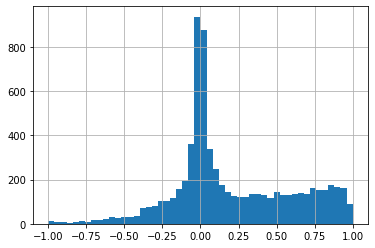

In [62]:
result_df.corr_value.hist(bins=50)

In [65]:
result_df[result_df.corr_value >0.40]

,inst,tf,ret_period,corr_period,corr_value
25,eurusd,240min,2,1,0.498493
50,eurusd,240min,3,1,0.661523
75,eurusd,240min,4,1,0.749651
76,eurusd,240min,4,2,0.499374
100,eurusd,240min,5,1,0.799737
...,...,...,...,...,...
7418,spy,1m,40,19,1.000000
7425,spy,1m,50,1,0.697959
7426,spy,1m,50,2,0.615332
7427,spy,1m,50,3,0.426701


In [66]:
"""
price prediction on best correlations
backtesting basic strategies:
strategies: 
following momentum, if prev_mom is up then buy.
mean reversal

test with candle. If prev candle is up then buy

MA crossovers

Implement ML on momentum and trend data, to predict next momentum

Advanced strategies:
use stop loss from volatility. Optimization

------------
filtering based on volat, volume indicators. + feature extraction + rwi
backtesting strategies with filtering

-----
Clustering market regimes. RWI, vol
Training/test on different market regimes
backtesting with custer regime filtering




"""

'\nprice prediction on best correlations\nbacktesting basic strategies:\nstrategies: \nfollowing momentum, if prev_mom is up then buy.\nmean reversal\n\ntest with candle. If prev candle is up then buy\n\nMA crossovers\n\nImplement ML on momentum and trend data, to predict next momentum\n\nAdvanced strategies:\nuse stop loss from volatility. Optimization\n\n------------\nfiltering based on volat, volume indicators. + feature extraction + rwi\nbacktesting strategies with filtering\n\n-----\nClustering market regimes. RWI, vol\nTraining/test on different market regimes\nbacktesting with custer regime filtering\n\n\n\n\n'